# Does drift in the PPC datasets align with variability?

We'll use the conditional mean+variance of the neural population activity. 
We want to know whether Δm, the drift in the location-triggered mean, can be explained by the observed trial to trial variability. 

Projecting a drift vector along observed variability amounts to:

\begin{equation}
\Delta m^\top \Sigma^{-1} \Delta m
\end{equation}

In other words, we'd like to measure drift in units of *standard deviations*, and understand if, in these units, drift is more or less aligned with population variability than expected. One "control" to compare against then, is to consider a spherical Gaussian. Neural signals should be standardized (z-scored) first to make this comparison make sense. 

## Analyze results

Go through each pair of sessions. Get units in common, and form a Δm and Σ matrix for each location. Get the expected drift relative to the population variability, relative to .. this isn't going to be well defined. Meh.

We'd like to use a normalized average overlap between the trial-to-trial variability (conditioned on behavior), and the drift in the average neuronal tuning over days. Drift is measured as a change in the behavior-conditioned mean of the bandpass-filtered z-scored log-calcium transients, $\Delta \mu$. 

If this were the variance, we'd want $\left<\Delta x \Delta x^\top\right>$. This is the expected dot-product between the deviations of data vectors from the mean. We want something similar: the expected dot product between the drift $\Delta \mu$ and the trial-to-trial fluctuations $\Delta x$. However, we only want to be sensitive to the orientation of $\Delta x$, not it's absolute direction, so we take the squares magnitude of this dot product.

\begin{equation}
\left< (\Delta m^\top \Delta x)^2 \right>
=
\left< \Delta m^\top \Delta x \Delta x^\top \Delta m \right>
=
\Delta m^\top \left<\Delta x \Delta x^\top \right> \Delta m
=
\Delta m^\top \Sigma \Delta m
\end{equation}

Note that we pulled $ \Delta m$ out of the expectation because, for a given pair of sessions, it is fixed and not a stochastic variable

## Normalize to largest eigenvector

The idea is to make it so that if $\Delta \mu$ is a "typical" vector as predicted by the trial-to-trial variability, then our "alignment" metric will return 1. One version of this is to find the largest eigenvector of Σ, which tim called the "rank 1 approximation" to the population alignment. This sounds good!

In detail: normalize $\Sigma$ so that $\lambda_{max}=1$, and normalize $\Delta\mu$ to unit length. The rank-1 approximation is just $\left< (\Delta\mu^\top v_{max})^2 \right>$

See: https://stackoverflow.com/questions/12167654/fastest-way-to-compute-k-largest-eigenvalues-and-corresponding-eigenvectors-with



In SciPy, you can use the linalg.eigh function, with the eigvals parameter.

    eigvals : tuple (lo, hi) Indexes of the smallest and largest (in ascending order) eigenvalues and corresponding eigenvectors to be returned: 0 <= lo < hi <= M-1. If omitted, all eigenvalues and eigenvectors are returned.

Which in your case should be set to (N-k,N-1).

## Alignment Statistics

To summarize the alignment of a drift vector $\Delta \mu$ with the distribution of inter-trial variability, we consider the trial-averaged mean $\mu$ and covariance $\Sigma$ of the neural activity (log calcium-fluorescence signals filtered between 0.03 and .3 Hz and z-scored), conditioned on trial location and the current/previous cue direction. We use the expected squared magnitude of the dot product between the change in trial-conditioned means between days ($\Delta \mu$), with the directions of inter-trial variability ($\Delta z{=}z{-}\left<z\right>$) on the first day, which is summarized by the product $\Delta\mu^\top\Sigma\Delta\mu$:

\begin{equation}
\begin{aligned}
{\left<|\Delta\mu^\top\Delta z|^2 \right>}
&={\left<\Delta\mu^\top\Delta z \Delta z^\top \Delta\mu \right>}
\\&={\Delta\mu^\top\left<\Delta z \Delta z^\top\right>\Delta\mu}
\\&={\Delta\mu^\top\Sigma\Delta\mu}
\end{aligned}
\end{equation}

To compare pairs of sessions with different amounts of drift and inter-trial variability, we normalize the drift vector to unit length, and normalize the trial-conditioned covariance by its largest eigenvalue $\lambda_{\text{max}}$:

\begin{equation}
\begin{aligned}
\phi_{\text{trial}}^2 
&= 
\frac
{\Delta\mu^\top\Sigma\Delta\mu}
{|\Delta\mu|^2 \cdot \lambda_{\text{max}}}
\end{aligned}
\end{equation}

The statistic $\phi_{\text{trial}}$ amounts to a normalized root-mean-squared dot product between the drift direction and the directions of trial-to-trial variability, and equals 1 if the drift aligns perfectly with the direction of largest inter-trial variability. Since randomly oriented drift directions will still align with some directions of variability, the expected squared dot-product between two randomly-oriented $D$-dimensional unit vectors scales as $1/D$. Accounting for the contribution from each dimension of $\Sigma$, the expected chance alignment is therefore $\phi^2_0={\operatorname{tr}(\Sigma)} / (D \cdot {\lambda_{\text{max}}})$. We use a normalized alignment coefficient $\rho_{\text{trial}}$ which is 0 for randomly oriented vectors, and 1 if the drift aligns perfectly with the direction of largest variability:

\begin{equation}
\begin{aligned}
\rho_{\text{trial}} &=
\frac
{\phi_{\text{trial}} - \phi_0}
{1-\phi_0}
\end{aligned}
\end{equation}



We define a similar alignment statistic $\rho_{\text{coding}}$ to assess how drift aligns with directions of neural variability important for encoding location. We consider the root-mean-squared dot product between the drift $\Delta\mu$, and the directions of neural activity ($z$) that vary with location ($x$) on a given trial, i.e. $\nabla_x z(x)$:
\begin{equation}
\begin{aligned}
{\left<|\Delta\mu^\top\nabla_x z(x)|^2 \right>}
&= 
{\left<\Delta\mu^\top[\nabla_x z(x)][\nabla_x z(x)]^\top \Delta\mu \right>}
\\&= 
{\Delta\mu^\top\left<[\nabla_x z(x)][\nabla_x z(x)]^\top\right>\Delta\mu}
\\&= 
{\Delta\mu^\top\left[
\Sigma_{\nabla}
+
\mu_{\nabla}
\mu_{\nabla}^\top
\right]\Delta\mu}
\end{aligned}
\end{equation}

In contrast to the trial-to-trial variability statistic, this statistic depends on the second moment  $\Sigma_{\nabla}+\mu_{\nabla}\mu_{\nabla}^\top$, where $\nabla_x z(x) \sim \mathcal N(\mu_{\nabla},\Sigma_{\nabla})$. We define a normalized $\phi_{\text{coding}}^2$ and $\rho_{\text{coding}}$ in the same way as $\phi_{\text{trial}}^2$ and $\rho_{\text{trial}}$.


# Overlap with 'orthogonal' space

 To assess alignment with null directions of a covariance or second moment $\Sigma$, we define a complementary measure which is a generalization of the dot-product of an angle with it's orthogonal direction in 2D space. Define $\Sigma^\bot$, such that $\Sigma^\bot + \Sigma = I \lambda_{\text{max}}$ (this is something like an orthogonal complement of a covariance). $\Sigma^\bot$ can be computed from $\Sigma$ by setting eigenvalues $\lambda_i^\bot \gets \lambda_{\text{max}}-\lambda_i$. Or more directly:
\begin{equation}
\Sigma^\bot = I \lambda_{\text{max}} - \Sigma
\end{equation}

Sanity check: confirm that eigenvalues sum to 1. Also confirm that this reduces to usual sine/cosine intution in 2D and if variability is confined to one direction.

# Examine alignment with coding direction

To do this, get the distribution of the change in neural states per change in trial location, $\Delta z$. Because of linearity, $\left<\Delta z\right> = \mu_2-\mu_1$. For covariance though we need the cross-correlation, which we did't store. So we recompute this.

# Get population covariability

For every session, get available units, get calcium signals, normalize them, get location-triggered statistics.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Add local scripts to path
import os,sys
sys.path.insert(0,os.path.abspath("./"))
import neurotools

# Set up cache
from neurotools.jobs.initialize_system_cache import initialize_caches,cache_test
PYCACHEDIR = os.path.abspath('./')
CACHENAME  = 'PPC_cache'
from neurotools.tools import ensure_dir
ensure_dir(PYCACHEDIR+os.sep+CACHENAME)
initialize_caches(
    level1  = PYCACHEDIR,
    force   = False,
    verbose = False,
    CACHE_IDENTIFIER = CACHENAME)

# Import libraries
from neurotools.nlab import *

import ppc_data_loader
# Set this to the location of the PPC data on your machine
ppc_data_loader.path = '/home/mer49/Dropbox (Cambridge University)/Datasets/PPC_data/'

from ppc_data_loader   import *
from ppc_trial         import *
from drift_alignment_routines import *

np.seterr(all='raise');

Data location is /home/mer49/Workspace2/PPC_data/


# Compute stats for all subjects

### Initialize caches and precompute results

In [2]:
from itertools import product

@memoize
def get_alignment_statistics(animal,LOWF=None,HIGHF=None):
    leftright = [ppc_trial.Trial.CUE_LEFT,ppc_trial.Trial.CUE_RIGHT]
    # Get all the activity from all sessions for this animal, for each of the 4 conditions
    activity_summary = {}
    for CUE,PREV in product(leftright,leftright):
        print('Getting trial-conditioned neural sigals for %s %s %s'%(animal,CUE,PREV))
        # allμ,allΣ,alldμ,alldΣ,allunits
        activity_summary[animal,CUE,PREV] = get_trial_conditioned_population_activity(animal,CUE,PREV,LOWF,HIGHF)
        # Not enough memory to leave cached datasets in RAM or open files
        release_files(clear_cache=True)
    # Lists for storing various alignment coefficients ρ
    variables  = 'ρnoise ρcode ρnoise_self ρcode_self ρnoise_chance ρcode_chance'.split()
    variables += 'rnoise rcode rnoise_self rcode_self rnoise_chance rcode_chance'.split()
    results = {v:[] for v in variables}
        
    # Find consecutive sessions
    sessions = array(get_session_ids(animal))
    days     = array(get_days(animal))
    ok       = np.where(diff(days)==1)[0]
    pairs    = list(zip(ok,sessions[ok],sessions[ok+1]))
    
    # Compare all pairs of consecutive sessions
    for i,s1,s2 in pairs:
        # Get units in common
        u1,u2 = [good_units_index(animal,s) for s in [s1,s2]]
        units = array(sorted(list(set(u1)&set(u2))))
        ix1 = [i for i in range(len(u1)) if u1[i] in units]
        ix2 = [i for i in range(len(u2)) if u2[i] in units]
        # Calculate alignment angle ρ for every location and previous/current cue condition
        for CUE,PREV in product(leftright,leftright):
            # Get population statistics for both days for this cue condition
            allμ,allΣ,alldμ,alldΣ,allunits = activity_summary[animal,CUE,PREV]
            μ1,μ2   = allμ[i:i+2]
            Σ1,Σ2   = allΣ[i:i+2]
            dμ1,dμ2 = alldμ[i:i+2]
            dΣ1,dΣ2 = alldΣ[i:i+2]
            # Extract the mean drift vector
            μ1r,μ2r = μ1[:,ix1],μ2[:,ix2]
            Σ1r,Σ2r = Σ1[:,ix1,:][:,:,ix1],Σ2[:,ix2,:][:,:,ix2]
            Δμ = μ2r - μ1r
            # Extract the coding-relevant distributions
            dμ1r,dμ2r = dμ1[:,ix1],dμ2[:,ix2]
            dΣ1r,dΣ2r = dΣ1[:,ix1,:][:,:,ix1],dΣ2[:,ix2,:][:,:,ix2]
            # Compare the drift direction with the coding axis
            # We need the 2nd moment not the covariance 
            # Since the absolut edisplacement matters
            dM21 = dΣ1r + array([outer(μ,μ) for μ in dμ1r])
            # Get alignment angle for every location: noise space and code space
            results['ρnoise']        += list(arraymap(alignment_angle_normalized       ,Δμ,Σ1r ).ravel())
            results['ρcode']         += list(arraymap(alignment_angle_normalized       ,Δμ,dM21).ravel())
            results['ρnoise_chance'] += list(arraymap(sample_alignment_angle_normalized,Σ1r ).ravel())
            results['ρcode_chance']  += list(arraymap(sample_alignment_angle_normalized,dM21).ravel())
            results['ρnoise_self']   += list(arraymap(sample_alignment_self_normalized ,Σ1r ).ravel())
            results['ρcode_self']    += list(arraymap(sample_alignment_self_normalized ,dM21).ravel())
            # unnormalized variants
            results['rnoise']        += list(arraymap(alignment_angle_unnormalized       ,Δμ,Σ1r ).ravel())
            results['rcode']         += list(arraymap(alignment_angle_unnormalized       ,Δμ,dM21).ravel())
            results['rnoise_chance'] += list(arraymap(sample_alignment_angle_unnormalized,Σ1r ).ravel())
            results['rcode_chance']  += list(arraymap(sample_alignment_angle_unnormalized,dM21).ravel())
            results['rnoise_self']   += list(arraymap(sample_alignment_self_unnormalized ,Σ1r ).ravel())
            results['rcode_self']    += list(arraymap(sample_alignment_self_unnormalized ,dM21).ravel())
    release_files(clear_cache=True)
    return {v:array(results[v]).ravel() for v in variables}


In [3]:
LOWF  = .03
HIGHF = .30
get_alignment_statistics(1,LOWF,HIGHF);

In [4]:
try:
    activity_summary
except:
    activity_summary = {}
animals = get_subject_ids()
for a in animals:
    results = get_alignment_statistics(a,LOWF,HIGHF)
    for k,v in results.items():
        activity_summary[a,k] = v

Getting trial-conditioned neural sigals for 3 0 0
Getting trial-conditioned neural sigals for 3 0 1                     
Getting trial-conditioned neural sigals for 3 1 0                     
Getting trial-conditioned neural sigals for 3 1 1                     
Getting trial-conditioned neural sigals for 4 0 0                     
Getting trial-conditioned neural sigals for 4 0 1                     
Getting trial-conditioned neural sigals for 4 1 0                     
Getting trial-conditioned neural sigals for 4 1 1                     
Getting trial-conditioned neural sigals for 5 0 0                     
Getting trial-conditioned neural sigals for 5 0 1                     
Getting trial-conditioned neural sigals for 5 1 0                     
Getting trial-conditioned neural sigals for 5 1 1                     


# As box plots

In [5]:
NBINS = 40
XMIN  = -0.1
XMAX  = 1
bins  = linspace(XMIN,XMAX,NBINS)
f     = lambda y:y
alpha = 0.7

Box plots: notches reflect bootstrap 95% confidence interval of the median, 1000 samples. Boxes reflect inter-quartile range. Whiskers reflect inner 95th percentile of the data distribution. Dashed vertical line reflects the upper 95th percentile of the chance distribution (black box plot).

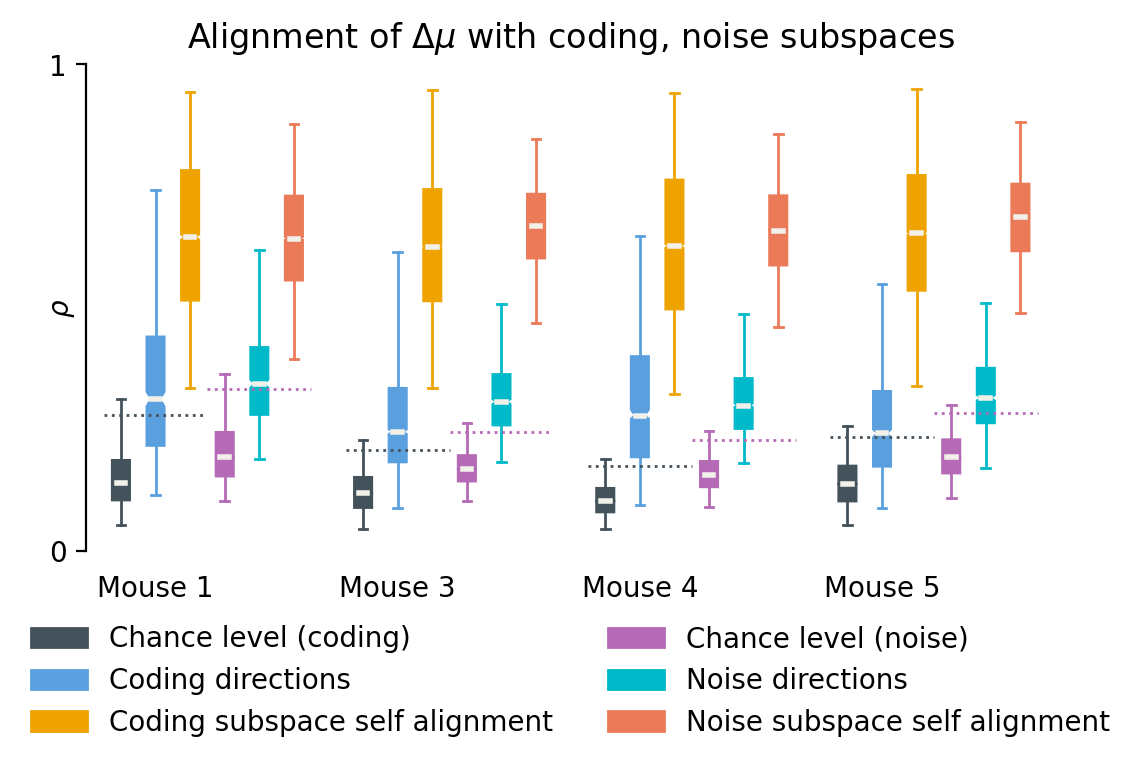

In [6]:
figure(figsize=(6,4))

for ia,animal in enumerate([1,3,4,5]):    
    vars  = [activity_summary[animal,'rcode_chance']]
    vars += [activity_summary[animal,'rcode']]
    vars += [activity_summary[animal,'rcode_self']]
    
    vars += [activity_summary[animal,'rnoise_chance']]
    vars += [activity_summary[animal,'rnoise']]
    vars += [activity_summary[animal,'rnoise_self']]
    N = len(vars)

    text(2+ia*(N+1),-0.05,'Mouse %d'%animal,ha='center',va='top')
    
    bp = {}
    for i,(distr,color) in enumerate(zip(vars,
                                 [BLACK,AZURE,OCHRE,MAUVE,TURQUOISE,RUST])):
        bp[i] = boxplot(distr,
                     positions=[i+1+ia*(N+1)],
                     widths=0.5,
                     vert=True,
                     showfliers=False,
                     patch_artist=True,
                     whis=[2.5, 97.5],
                     notch=True,
                     bootstrap=1000,
                     medianprops={'linewidth':2,'color':WHITE})
        
        nicebp(bp[i],color=color,linewidth=1)
        if i==0 or i==3:
            py = percentile(distr,95)
            px = ia*(N+1)+i+0.5
            plot([px,px+3],[py,py],lw=1,color=color,linestyle=':',zorder=1000)

labels = [bp[i]["boxes"][0] for i in range(6)]
baselegend(labels, ['Chance level (coding)',
                'Coding directions',
                'Coding subspace self alignment',
                'Chance level (noise)',
                'Noise directions',
                'Noise subspace self alignment'], 
          ncol=2)

simpleraxis()
yticks([0,1])
xticks([])
xlim(0,4*(1+N))
fudgey()
ylabel(r'$\rho$')
title('Alignment of $\Delta\mu$ with coding, noise subspaces')

tight_layout()
savefigure('Alignment_unnormalized_2',snap=False)

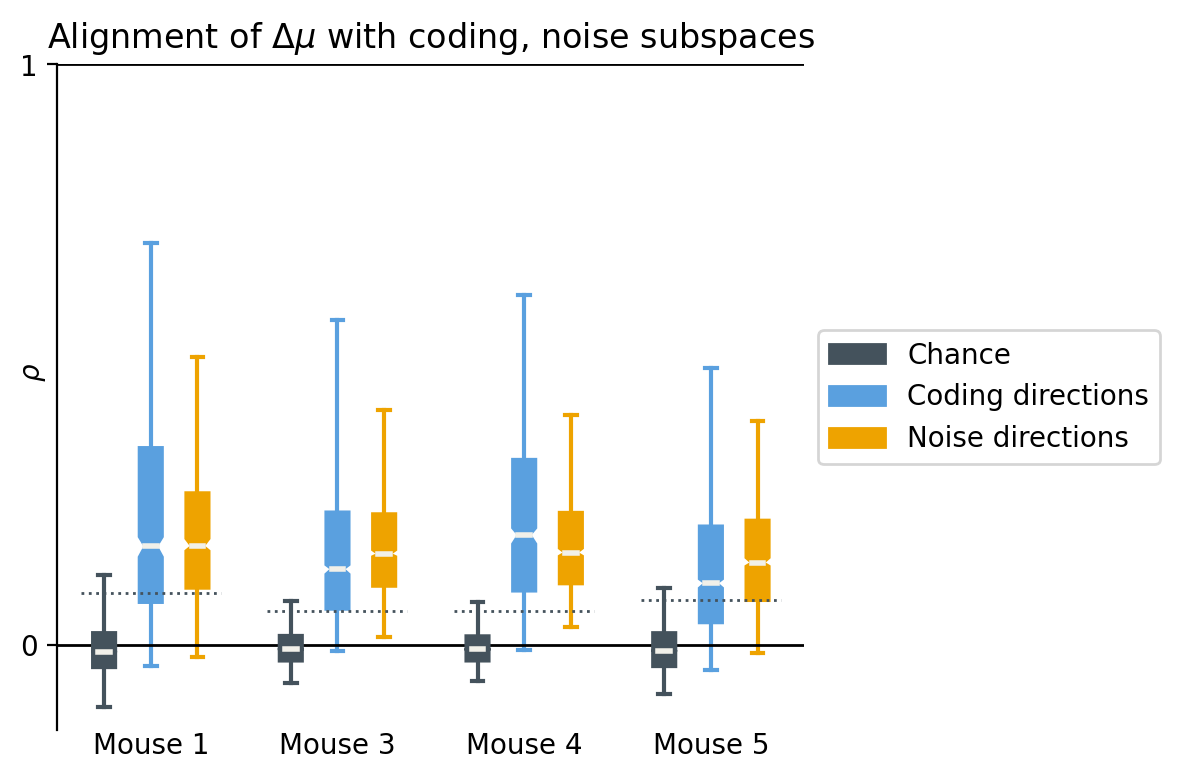

In [7]:
figure(figsize=(6,4))

for ia,animal in enumerate([1,3,4,5]):
    
    vars = [activity_summary[animal,'ρ%s'%var] for var in ('code','noise')]
    vars = [cat([activity_summary[animal,'ρcode_chance'],activity_summary[animal,'ρnoise_chance']])] + vars
    N = len(vars)
    text(2+ia*(N+1),-0.15,'Mouse %d'%animal,ha='center',va='top')
    bp = {}
    for i,(distr,color) in enumerate(zip(vars,[BLACK,AZURE,OCHRE])):
        bp[i] = boxplot(distr,
                     positions=[i+1+ia*(N+1)],
                     widths=0.5,
                     vert=True,
                     showfliers=False,
                     patch_artist=True,
                     whis=[2.5, 97.5],
                     notch=True,
                     bootstrap=1000,
                     medianprops={'linewidth':2,'color':WHITE})
        
        nicebp(bp[i],color=color,linewidth=1.5)
    i = 0 
    pooled_chance = concatenate([activity_summary[animal,'ρcode_chance'],activity_summary[animal,'ρnoise_chance']])
    py = percentile(pooled_chance,95)
    px = ia*(N+1)+i+0.5
    plot([px,px+3],[py,py],lw=1,color=BLACK,linestyle=':',zorder=1000)
        
labels = [bp[i]["boxes"][0] for i in range(len(bp))]
legend(labels, ['Chance','Coding directions','Noise directions'], 
       loc='center left', 
       bbox_to_anchor=(1, 0.5))

simpleraxis()
ylim(ylim()[0],1)
yticks([0,1])
xticks([])
axhline(0,lw=1,color='k')
axhline(1,lw=1,color='k')
xlim(0,4*(1+N))
fudgey()
ylabel('      $\\rho$')
title('Alignment of $\Delta\mu$ with coding, noise subspaces')

tight_layout()
savefigure('Alignment',snap=False)